In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

import imblearn
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, f1_score, classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
# load data đã được tiền xử lý
train = pd.read_csv('data/train_eda.csv')
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_37,id_38,DeviceType,DeviceInfo,OS_id_30,version_id_30,screen_width,screen_height,DeviceCorp,hour_warning
0,2987000,0,86400,68.5,W,13926,143.0,150.0,discover,240.0,...,MISSING,MISSING,MISSING,MISSING,MISSING,MISSING,-1,-1,NAN,lowwarningsign
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,MISSING,MISSING,MISSING,MISSING,MISSING,MISSING,-1,-1,NAN,lowwarningsign
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,MISSING,MISSING,MISSING,MISSING,MISSING,MISSING,-1,-1,NAN,lowwarningsign
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,MISSING,MISSING,MISSING,MISSING,MISSING,MISSING,-1,-1,NAN,lowwarningsign
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,T,T,mobile,Samsung,Android,7.0,2220,1080,SAMSUNG,lowwarningsign


In [3]:
train.shape

(542580, 199)

In [4]:
# in ra các cột 
for col in train.columns:
    print(col)

TransactionID
isFraud
TransactionDT
TransactionAmt
ProductCD
card1
card2
card3
card4
card5
card6
addr1
addr2
dist1
P_emaildomain
R_emaildomain
C1
C2
C3
C4
C5
C6
C7
C8
C9
C10
C11
C12
C13
C14
D1
D3
D4
D5
D8
D9
D10
D11
D13
D14
D15
M1
M2
M3
M4
M5
M6
M7
M8
M9
V1
V3
V4
V6
V8
V11
V13
V14
V17
V20
V23
V26
V27
V30
V36
V37
V40
V41
V44
V47
V48
V54
V56
V59
V62
V65
V67
V68
V70
V76
V78
V80
V82
V86
V88
V89
V91
V96
V98
V99
V104
V107
V108
V111
V115
V117
V120
V121
V123
V124
V127
V129
V130
V136
V169
V171
V173
V175
V176
V178
V180
V182
V185
V187
V188
V198
V203
V205
V207
V209
V210
V215
V218
V220
V221
V223
V224
V226
V228
V229
V234
V235
V238
V240
V250
V252
V253
V257
V258
V260
V261
V264
V266
V267
V271
V274
V277
V281
V283
V284
V285
V286
V289
V291
V294
V296
V297
V301
V303
V305
V307
V309
V310
V314
V320
id_01
id_02
id_03
id_04
id_05
id_06
id_09
id_10
id_11
id_12
id_13
id_14
id_15
id_16
id_17
id_19
id_20
id_28
id_29
id_31
id_32
id_34
id_35
id_36
id_37
id_38
DeviceType
DeviceInfo
OS_id_30
version_id_30
screen_width
s

In [5]:
# tách nhãn 
y = train['isFraud']
X = train.drop('isFraud', axis=1)

In [6]:
# lấy các cột numerical
num_cols = X.select_dtypes(include=np.number).columns.tolist()

# lấy các cột categorical
cat_cols = [col for col in X.columns.values if col not in num_cols]

In [7]:
# min max scale numeric columns
minmax = MinMaxScaler()
minmax.fit(X[num_cols])
X[num_cols] = minmax.transform(X[num_cols])

# label encode categorical columns
le = LabelEncoder()
for col in cat_cols:
    X[col] = le.fit_transform(X[col])

In [9]:
# lấy tập train và test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y, random_state=42)

In [10]:
# xem phân bố nhãn của y_train
y_train.value_counts(normalize=True)

0    0.965475
1    0.034525
Name: isFraud, dtype: float64

In [11]:
# xem phân bố nhãn của y_test
y_test.value_counts(normalize=True)

0    0.965471
1    0.034529
Name: isFraud, dtype: float64

### Sử dụng phương pháp Undersampling

In [12]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)

In [13]:
Counter(y_res)

Counter({0: 14986, 1: 14986})

### Mô hình Multinomial Naive Bayes chưa tune

In [16]:
model_MNB = MultinomialNB(alpha=0.1)
model_MNB.fit(X_res, y_res)

MultinomialNB(alpha=0.1)

In [17]:
# xác suất của nhãn 1
y_pred_probs = model_MNB.predict_proba(X_test)[:, 1]

# nhãn dự đoán
y_pred = model_MNB.predict(X_test)

In [18]:
# ROC
roc_auc_score(y_test, y_pred_probs)

0.7116248933312928

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.77      0.86    104769
           1       0.08      0.55      0.14      3747

    accuracy                           0.76    108516
   macro avg       0.53      0.66      0.50    108516
weighted avg       0.95      0.76      0.84    108516



ROC: 0.7116, Precision (nhãn 1): 0.08, Recall (nhãn 1): 0.55

### Hyperparamters Tuning cho Multinomial Naive Bayes (tune alpha)

In [21]:
from sklearn.model_selection import KFold

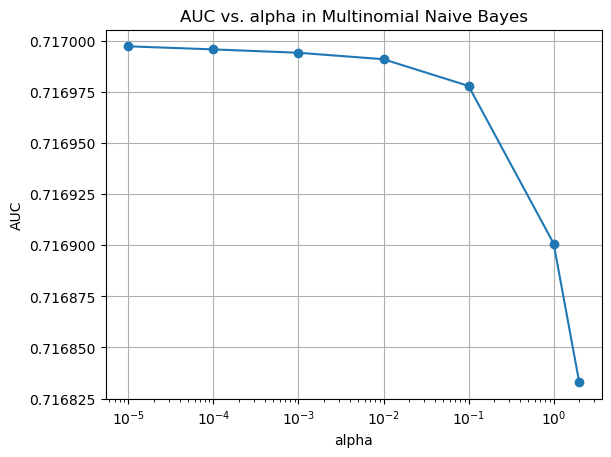

In [22]:
alphas = [2,1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
roc = []
kf = KFold(shuffle=True,random_state=42)
for alpha in alphas:
    model_GNB = MultinomialNB(alpha=alpha)
    scores = []
    for i, (train_index, val_index) in enumerate(kf.split(X_res)):
        X_train_i = X_res.loc[train_index]
        y_train_i = y_res[train_index]
        X_val_i = X_res.loc[val_index]
        y_val_i = y_res[val_index]
        model_GNB.fit(X_train_i, y_train_i)
        y_pred_i = model_GNB.predict_proba(X_val_i)[:, 1]
        scores.append(roc_auc_score(y_val_i, y_pred_i))

    # Hoàn thiện thêm phần code ở đây để ghi nhận acc tương ứng trong từng trường hợp
    roc.append(np.mean(scores))

# Minh họa tương quan bằng đồ thị

plt.plot(alphas, roc, marker="o", linestyle="-")
plt.xscale("log")  # Set the x-axis to be logarithmic
plt.xlabel("alpha")
plt.ylabel("AUC")
plt.title("AUC vs. alpha in Multinomial Naive Bayes")
plt.grid(True)
plt.show()

Nhìn vào biểu đồ trên, ta sẽ chọn alpha=0.0001 vì nó cho ROC trên tập validation lớn nhất

In [23]:
# mô hình MNB đã được chọn tham số tối ưu 
model_MNB = MultinomialNB(alpha=1e-5)
model_MNB.fit(X_res, y_res)
y_pred = model_MNB.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.77      0.86    104769
           1       0.08      0.55      0.14      3747

    accuracy                           0.76    108516
   macro avg       0.53      0.66      0.50    108516
weighted avg       0.95      0.76      0.84    108516



In [24]:
y_pred_probs = model_MNB.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_pred_probs)

0.7116400244121904

ROC: 0.7116, Precision (nhãn 1): 0.08, Recall (nhãn 1): 0.55

### Mô hình Gaussian Naive Bayes chưa tune

In [25]:
# trả về giá trị ban đầu của những cột bị min-max scale
X[num_cols] = minmax.inverse_transform(X[num_cols])
X[num_cols]

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,...,id_09,id_10,id_11,id_13,id_14,id_17,id_19,id_20,screen_width,screen_height
0,2987000.0,86400.0,68.50,13926.0,143.0,150.0,240.0,315.0,87.0,19.000000,...,-46.0,-110.0,80.0,66.0,722.0,231.0,673.0,663.0,-1.0,-1.0
1,2987001.0,86401.0,29.00,2755.0,404.0,150.0,102.0,325.0,87.0,1927.650000,...,-46.0,-110.0,80.0,66.0,722.0,231.0,673.0,663.0,-1.0,-1.0
2,2987002.0,86469.0,59.00,4663.0,490.0,150.0,166.0,330.0,87.0,287.000000,...,-46.0,-110.0,80.0,66.0,722.0,231.0,673.0,663.0,-1.0,-1.0
3,2987003.0,86499.0,50.00,18132.0,567.0,150.0,117.0,476.0,87.0,156.030000,...,-46.0,-110.0,80.0,66.0,722.0,231.0,673.0,663.0,-1.0,-1.0
4,2987004.0,86506.0,50.00,4497.0,514.0,150.0,102.0,420.0,87.0,1877.150000,...,-46.0,-110.0,100.0,66.0,-480.0,166.0,542.0,144.0,2220.0,1080.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542575,3530587.0,14335388.0,335.00,2455.0,321.0,150.0,226.0,272.0,87.0,30.717000,...,-46.0,-110.0,80.0,66.0,722.0,231.0,673.0,663.0,-1.0,-1.0
542576,3530588.0,14335394.0,47.95,8320.0,476.0,150.0,166.0,191.0,87.0,1.000000,...,-46.0,-110.0,80.0,66.0,722.0,231.0,673.0,663.0,-1.0,-1.0
542577,3530589.0,14335418.0,51.00,1974.0,111.0,150.0,226.0,184.0,87.0,20.120000,...,-46.0,-110.0,80.0,66.0,722.0,231.0,673.0,663.0,-1.0,-1.0
542578,3530590.0,14335495.0,105.95,16132.0,111.0,150.0,226.0,299.0,87.0,23.855071,...,-46.0,-110.0,80.0,66.0,722.0,231.0,673.0,663.0,-1.0,-1.0


Gaussian Naive Bayes yêu cầu các cột numeric phải theo phân phối chuẩn, vì vậy ta sẽ dùng Standard Scaler để chuẩn hóa các cột numeric

In [26]:
se = StandardScaler()
se.fit(X[num_cols])
X[num_cols] = se.transform(X[num_cols])

In [27]:
# Tách tập train test và undersample một lần nữa
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y, random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)

In [28]:
model_GNB = GaussianNB()
model_GNB.fit(X_res, y_res)
y_pred_probs = model_GNB.predict_proba(X_test)[:, 1]
y_pred = model_GNB.predict(X_test)

roc_auc_score(y_test, y_pred_probs)

0.7481590435453226

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.77      0.86    104769
           1       0.08      0.58      0.14      3747

    accuracy                           0.76    108516
   macro avg       0.53      0.67      0.50    108516
weighted avg       0.95      0.76      0.84    108516



ROC: 0.7482, Precision(nhãn 1): 0.08, Recall (nhãn 1): 0.58

### Hyperparameters tuning cho mô hình Gaussian Naive Bayes (tune var_smoothing)

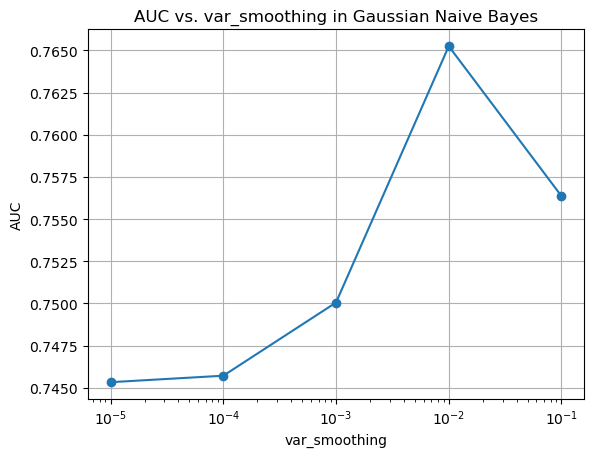

In [31]:
var_smoothings = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
roc = []
kf = KFold(shuffle=True,random_state=42)
for var_smoothing in var_smoothings:
    model_GNB = GaussianNB(var_smoothing=var_smoothing)
    scores = []
    for i, (train_index, val_index) in enumerate(kf.split(X_res)):
        X_train_i = X_res.loc[train_index]
        y_train_i = y_res[train_index]
        X_val_i = X_res.loc[val_index]
        y_val_i = y_res[val_index]
        model_GNB.fit(X_train_i, y_train_i)
        y_pred_i = model_GNB.predict_proba(X_val_i)[:, 1]
        scores.append(roc_auc_score(y_val_i, y_pred_i))

    # Hoàn thiện thêm phần code ở đây để ghi nhận acc tương ứng trong từng trường hợp
    roc.append(np.mean(scores))

# Minh họa tương quan bằng đồ thị
# Gợi ý: barplot, lineplot, logarithmic plot

plt.plot(var_smoothings, roc, marker="o", linestyle="-")
plt.xscale("log")  # Set the x-axis to be logarithmic
plt.xlabel("var_smoothing")
plt.ylabel("AUC")
plt.title("AUC vs. var_smoothing in Gaussian Naive Bayes")
plt.grid(True)
plt.show()

``var_smoothing`` sẽ được chọn bằng 0.01

In [32]:
model_GNB = GaussianNB(var_smoothing=0.01)
model_GNB.fit(X_res, y_res)
y_pred = model_GNB.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88    104769
           1       0.09      0.53      0.15      3747

    accuracy                           0.79    108516
   macro avg       0.53      0.66      0.52    108516
weighted avg       0.95      0.79      0.86    108516



In [33]:
y_pred_probs = model_GNB.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_pred_probs)

0.7655819928399267

ROC: 0.7656, Precision(nhãn 1): 0.09, Recall (nhãn 1): 0.53

### Mô hình hồi quy Logistic (Logistic Regression)

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
logr = LogisticRegression()
logr.fit(X_res, y_res)
logr

LogisticRegression()

In [36]:
y_pred = logr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.82      0.89    104769
           1       0.12      0.73      0.21      3747

    accuracy                           0.81    108516
   macro avg       0.56      0.77      0.55    108516
weighted avg       0.96      0.81      0.87    108516



In [37]:
y_pred_probs = logr.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_pred_probs)

0.8505634352187722

ROC: 0.8506, Precision(nhãn 1): 0.12, Recall (nhãn 1): 0.73

### Hyperparameters tuning cho Logistic Regression (tune C, solver và penalty)

#### Tune C độc lập trước để tiết kiệm thời gian

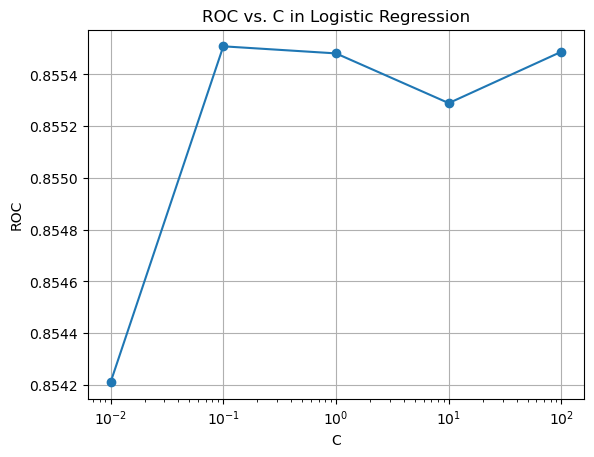

In [38]:
C = [0.01, 0.1, 1, 10, 100]

roc = []
kf = KFold(shuffle=True,random_state=42)
for c in C:
    logr = LogisticRegression(C=c)
    scores = []
    for i, (train_index, val_index) in enumerate(kf.split(X_res)):
        X_train_i = X_res.loc[train_index]
        y_train_i = y_res[train_index]
        X_val_i = X_res.loc[val_index]
        y_val_i = y_res[val_index]
        logr.fit(X_train_i, y_train_i)
        y_pred_i = logr.predict_proba(X_val_i)[:, 1]
        scores.append(roc_auc_score(y_val_i, y_pred_i))

    # Hoàn thiện thêm phần code ở đây để ghi nhận acc tương ứng trong từng trường hợp
    roc.append(np.mean(scores))

# Minh họa tương quan bằng đồ thị
# Gợi ý: barplot, lineplot, logarithmic plot

plt.plot(C, roc, marker="o", linestyle="-")
plt.xscale("log")  # Set the x-axis to be logarithmic
plt.xlabel("C")
plt.ylabel("ROC")
plt.title("ROC vs. C in Logistic Regression")
plt.grid(True)
plt.show()

In [39]:
logr = LogisticRegression(solver='liblinear', C=0.1)
logr.fit(X_res, y_res)
y_pred = logr.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.82      0.90    104769
           1       0.13      0.74      0.22      3747

    accuracy                           0.82    108516
   macro avg       0.56      0.78      0.56    108516
weighted avg       0.96      0.82      0.87    108516



In [40]:
y_pred_probs = logr.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_pred_probs)

0.8551107580729355

#### Với C=0.1 tìm được ở trên, tìm solver và penalty tối ưu nhất bằng grid-search

In [41]:
from sklearn.model_selection import GridSearchCV
solvers = ['newton-cg', 'liblinear', 'saga']
penalty = ['l1', 'l2']
c_values = [0.1]
# define grid search
model = LogisticRegression()
grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, scoring='roc_auc')
grid_result = grid_search.fit(X_res, y_res)

In [42]:
grid_result

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1], 'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'liblinear', 'saga']},
             scoring='roc_auc')

In [43]:
grid_result.best_estimator_

LogisticRegression(C=0.1, solver='newton-cg')

In [44]:
logr = LogisticRegression(solver='newton-cg', C=0.1)
logr.fit(X_res, y_res)
y_pred = logr.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.82      0.90    104769
           1       0.13      0.74      0.22      3747

    accuracy                           0.82    108516
   macro avg       0.56      0.78      0.56    108516
weighted avg       0.96      0.82      0.87    108516



In [45]:
y_pred_probs = logr.predict_proba(X_test)[:, 1]

roc_auc_score(y_test, y_pred_probs)

0.8551302603549813

ROC: 0.8551, Precision (nhãn 1): 0.13, Recall (nhãn 1): 0.74